<a href="https://colab.research.google.com/github/timmmariya/Empirical-Law-Studies/blob/main/4_%D0%9E%D1%82%D1%80%D0%B8%D1%81%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BA%D0%B0%D1%80%D1%82%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D0%BF%D0%BE_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0%D0%BC_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B8_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Представленный Colab Notebook является частью серии наработок по исследованиям в области практической оценки судопроизводства методами численного анализа, проводимых [НУЛ анализа данных правоприменения НИУ ВШЭ](https://adp.hse.ru/). 

Контактная информация рабочей группы: gkrasnozhenov@hse.ru (Григорий Григорьевич Красноженов, ЗавЛаб НУЛ АДП), timmariya541@gmail.com (Мария Тимонина, стажер, ответственный за текущую задачу)

Материалом для анализа служат **данные системы арбитражных судов РФ**.

---

# Подключение библиотек, установка пакетов

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import locale
from PIL import Image

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=A91qAwyjOTs8

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

# Загрузка и настраивание проекции карты России

In [ ]:
regions = gpd.read_file('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/RegionsFolder/russia_forest_25people.geojson')

https://habr.com/ru/post/459902/

In [ ]:
regions

,id,for_square,for_land,eco_act,main_name,main_population,main_econom_act_pop,main_forest_square,main_forestland,_cartodb_id0,cartodb_id,created_at,updated_at,geometry
0,10,14902.0,53.0,52,Карелия,637000,328084,14902,53,0,1,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((32.86529 66.58260, 32.86558 66..."
1,18,11371.0,50.0,39,Тыва,310000,122028,11371,50,1,2,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((99.23077 52.96335, 99.23064 52..."
2,49,270.0,8.0,51,Курская область,1119000,574614,270,8,2,3,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((37.73833 52.01711, 37.75667 52..."
3,38,698.0,4.0,52,Волгоградская область,2583000,1345884,698,4,3,4,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((42.88530 51.23055, 42.88490 51..."
4,27,163937.0,45.0,53,Красноярский край,2847000,1515973,163937,45,4,5,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((84.32119 69.57919, 84.30749 69..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,30,130.0,2.0,49,Ставропольский край,2791000,1362335,130,2,82,81,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((42.94297 46.22167, 42.96195 46..."
81,6,84.0,22.0,45,Ингушетия,442000,200538,84,22,0,82,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((44.64937 43.54212, 44.65325 43..."
82,78,NaN,NaN,57,Москва,11980000,6879314,None,None,1115,83,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((37.19024 56.02073, 37.19074 56..."
83,21,367.0,21.0,49,Чечня,1325000,648831,367,21,0,84,2015-06-29T23:15:26+00:00,2015-06-29T23:15:26+00:00,"MULTIPOLYGON (((45.44139 44.00983, 45.48877 44..."


In [ ]:
regions.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
regions = regions.to_crs('ESRI:102012')

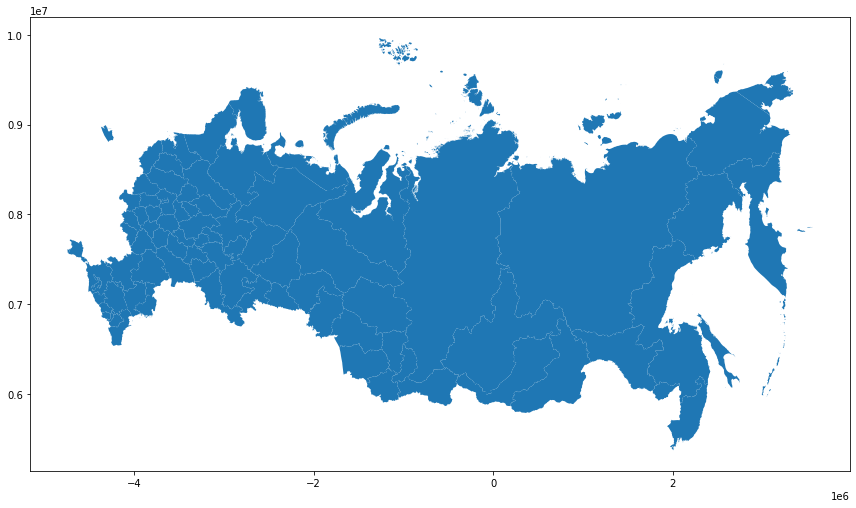

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
regions.plot(ax=ax)
#cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_Colab Notebooks НУЛ АДП/pics/overlay_map.png')
plt.show()

## Сопоставление кодов Арбитражных судов и регионов России из датафрейма карты

In [ ]:
regions_verify = regions[['id', 'main_name']]

In [ ]:
regions_verify.sort_values(by='id')[:5]

,id,main_name
20,1,Адыгея
23,2,Башкортостан
26,3,Бурятия
16,4,Алтай
12,5,Дагестан


In [ ]:
regions_verify.to_excel('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/df_regions_map.xlsx')

In [ ]:
pathc = "/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/indexed_courts.csv"
df_courts = pd.read_csv(pathc, sep=',')
df_courts

,ID,Ccode,Cname,Caltname,Calt2name,CTypeID,IDupperCourt,DistrID
0,1,А01,АС Республики Адыгея,--,--,1,215,8
1,2,А02,АС Республики Алтай,--,--,1,207,4
2,3,А03,АС Алтайского края,--,--,1,207,4
3,4,А04,АС Амурской области,--,--,1,206,3
4,5,А05,АС Архангельской области,ПСП Арбитражный суд Архангельской области,--,1,214,7
...,...,...,...,...,...,...,...,...
113,309,Ф09,АС Уральского округа,АС УО,--,3,401,9
114,310,Ф10,АС Центрального округа,АС ЦО,--,3,401,10
115,400,ВАС,Высший Арбитражный Суд РФ,ВАС РФ,--,4,400,0
116,401,ВС,Верховный Суд РФ,ВС РФ,--,4,400,0


Настройка красоты

https://habr.com/ru/post/515328/

https://www.machinelearningmastery.ru/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630/



# Рассчет матриц проверки гипотезы о средних для заданных дат и уровня значимости

In [ ]:
pathid = "/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/id_regionid.csv"
id_regid = pd.read_csv(pathid, sep=';')

In [ ]:
dict_ids = id_regid.set_index('ID').to_dict()['RID']

In [ ]:
path = "/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/2015_2020_cleaned_dates.csv"
df = pd.read_csv(path, sep=',')

df['StartDate'] = pd.to_datetime(df['StartDate'])
df['FinishDate'] = pd.to_datetime(df['FinishDate'])

df = df[df['CategoryID'] < 203]

In [ ]:
pathc = "/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_data/indexed_courts.csv"
df_courts = pd.read_csv(pathc, sep=',')
ic_cname = df_courts[['ID', 'Cname']].set_index('ID').to_dict()['Cname']

In [ ]:
def K_value(categ1, categ2, df_work) :
    mean1 = df_work.at[categ1, 'mean']
    mean2 = df_work.at[categ2, 'mean']

    std1 = df_work.at[categ1, 'std']
    std2 = df_work.at[categ2, 'std']

    n1 = df_work.at[categ1, 'count']
    n2 = df_work.at[categ2, 'count']

    k = (mean1 - mean2) / np.sqrt(std1 * std1 / n1 + std2 * std2 / n2)
    return k

def norm_distr_quantiles(alpha) :
    norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 
    sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений

    gamma = 1 - alpha / 2

    q_right = norm_rv.ppf(gamma)
    q_left = (-1) * q_right
    return gamma, q_left, q_right

In [ ]:
courts_met = df.groupby('CourtID')['ConsidTime'].agg(['count']).index.to_list()
courtot = len(courts_met)

def pairwise_hypothesis_test_courts(left_border_date, right_border_date, dest, alpha=0.05, min_count=0, fs=15, df=df) :

    # отбор из полной базы всех дел за период от левой граничной даты до правой
    df_parse = df[(df['StartDate'] <= pd.to_datetime(right_border_date)) & (df['FinishDate'] >= pd.to_datetime(left_border_date))]
    # подсчет средних, стандартных отклонений, кол-ва дел для каждой из категорий -> сохранение в dataframe df_work
    df_work = df_parse.groupby('CourtID')['ConsidTime'].agg(['mean', 'std', 'count'])
    # рассматриваются только состоятельные категории, содержащие не менее min_count дел
    df_work = df_work[df_work['count'] > min_count]

    court_list_used = df_work.index
    cnum = len(court_list_used)

    useid = [0 for i in range(cnum)]
    p = 0
    for i in range(cnum) :
        while (courts_met[p] < court_list_used[i]) :
          p += 1
        useid[i] = p
        p += 1

    # Подсчет значения критерия К для всех пар категорий
    kdata = [[0] * courtot for i in range(courtot)]
    for i in range(cnum) :
        for j in range(cnum) :
            ii = useid[i]
            jj = useid[j]
            kdata[ii][jj] = K_value(court_list_used[i], court_list_used[j], df_work)
    df_kcrit = pd.DataFrame(kdata, index=range(courtot), columns=range(courtot))

    # определение границ доверительного интервала
    gamma, q_left, q_right = norm_distr_quantiles(alpha)
    # проверка гипотезы о равенстве средних для каждой пары
    hy_data = [[2] * courtot for i in range(courtot)]
    for i in range(cnum) :
        for j in range(cnum) :
            ii = useid[i]
            jj = useid[j]
            if (kdata[ii][jj] > q_left) and (kdata[ii][jj] < q_right) :
                hy_data[ii][jj] = 1
            else :
                hy_data[ii][jj] = 0
    df_hypo = pd.DataFrame(hy_data, index=range(courtot), columns=range(courtot))

    fits = [0 for i in range(courtot)]
    for i in range(cnum) :
        sum = 0
        for j in range(cnum) :
            ii = useid[i]
            jj = useid[j]
            sum += hy_data[ii][jj]
        fits[useid[i]] = sum
    dest['fits'] = fits

    #sns.heatmap(df_hypo, square=True, ax=axi, cbar=False)

In [ ]:
lb = ['2015-02-01']
rb = ['2016-02-01']

tc = pd.DataFrame([courts_met]).transpose()
tc.rename(columns={0 : 'Court'}, inplace=True)

for i in range(len(lb)) :
    pairwise_hypothesis_test_courts(lb[i], rb[i], tc, alpha=0.1)

# Построение алгоритма визуализации отличающихся от среднего регионов на карте

In [ ]:
tc.set_index('Court', inplace=True)
tc['Region_id'] = tc.index.map(dict_ids)
#tc['Cname'] = tc.index.map(ic_cname)

tc.sort_values(by='fits', ascending=True, inplace=True)
df_test = tc[['fits', 'Region_id']].set_index('Region_id')

In [ ]:
def change(x, border) :
  if x and (x <= border) :
      return 1
  else:
      return 0

In [ ]:
reg_test = regions[['id', 'main_name', 'geometry']]
reg_test.set_index('id', inplace=True)

df_joined = reg_test.join(df_test)
border = df_joined.sort_values(by='fits')['fits'].values[14]
df_joined['show'] = df_joined['fits'].apply(lambda x: change(x, border))
list_show = df_joined[df_joined['show'] == 1].sort_values(by='fits')['main_name'].values
str_show = ''
for word in list_show:
    str_show += word
    str_show += '\n\n'

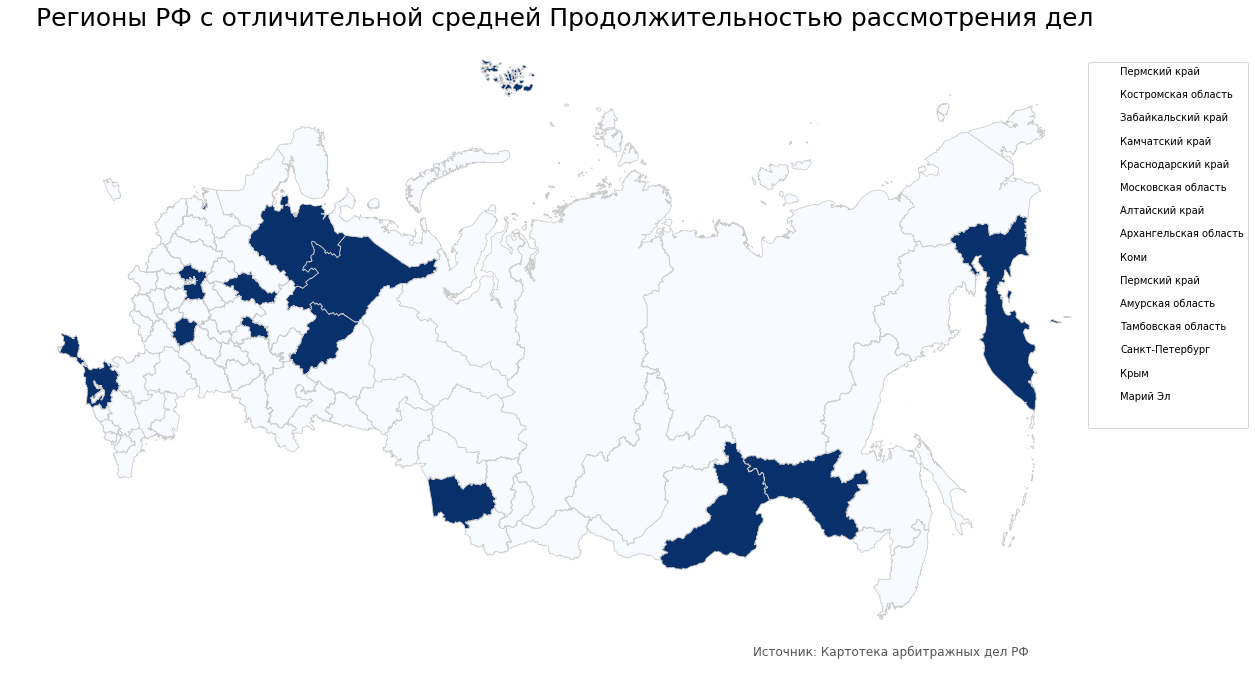

In [ ]:
variable = 'show'
# set the range for the choropleth values
###vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Регионы РФ c отличительной средней Продолжительностью рассмотрения дел', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Источник: Картотека арбитражных дел РФ', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

regtext = mpatches.Patch(label=str_show, color='white', linewidth=0)
plt.legend(handles=[regtext], bbox_to_anchor=(0.97, 0.95), loc='upper left', borderaxespad=0., facecolor='white')

df_joined.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


plt.tight_layout()
plt.savefig('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_Colab Notebooks НУЛ АДП/pics/first_check.png')

#im_crop.save('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_Colab Notebooks НУЛ АДП/pics_cropped/first_check.png', quality=95)

In [ ]:

#im = Image.open('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_Colab Notebooks НУЛ АДП/pics/first_check.png')

#im.crop((100, 75, 300, 150))

# Оформление кода в единую функцию для запуска цикла на большом временном промежутке

In [ ]:
locale.setlocale(locale.LC_ALL, '')

def create_regions_map_from_hypo_matrix(start_date, period, q_of_shown=15) :
    lb = pd.to_datetime(start_date)
    rb = pd.to_datetime(lb) + pd.to_timedelta(period)

    tc = pd.DataFrame([courts_met]).transpose()
    tc.rename(columns={0 : 'Court'}, inplace=True)

    pairwise_hypothesis_test_courts(lb, rb, tc, alpha=0.1)

    tc.set_index('Court', inplace=True)
    tc['Region_id'] = tc.index.map(dict_ids)

    tc.sort_values(by='fits', ascending=True, inplace=True)
    df_test = tc[['fits', 'Region_id']].set_index('Region_id')

    def change(x, border) :
      if x and (x <= border) :
          return 1
      else:
          return 0

    reg_test = regions[['id', 'main_name', 'geometry']]
    reg_test.set_index('id', inplace=True)

    df_joined = reg_test.join(df_test)
    border = df_joined.sort_values(by='fits')['fits'].values[q_of_shown - 1]
    df_joined['show'] = df_joined['fits'].apply(lambda x: change(x, border))
    list_show = df_joined[df_joined['show'] == 1].sort_values(by='fits')['main_name'].values
    str_show = ''
    for word in list_show:
        str_show += word
        str_show += '\n\n'

    fig, ax = plt.subplots(1, figsize=(30, 10))
    ax.axis('off')

    # add a title and annotation
    ax.set_title('Регионы РФ c отличительной средней Продолжительностью рассмотрения дел', fontdict={'fontsize': '20', 'fontweight' : '3'})
    ax.annotate('Источник: Картотека арбитражных дел РФ', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

    regtext = mpatches.Patch(label=str_show, color='white', linewidth=0)
    plt.legend(handles=[regtext], bbox_to_anchor=(0.97, 0.95), loc='upper left', borderaxespad=0., facecolor='white', fontsize=13)
    ax.annotate(lb.strftime("%B %Y") + ' - '+ rb.strftime("%B %Y"), xy=(0.3, .2), xycoords='figure fraction', fontsize=15, color='k')
    df_joined.plot(column='show', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/НУЛ АДП Материалы Марии Тимониной/_Colab Notebooks НУЛ АДП/pics/' + lb.strftime("%Y-%m-%d") + '.png')

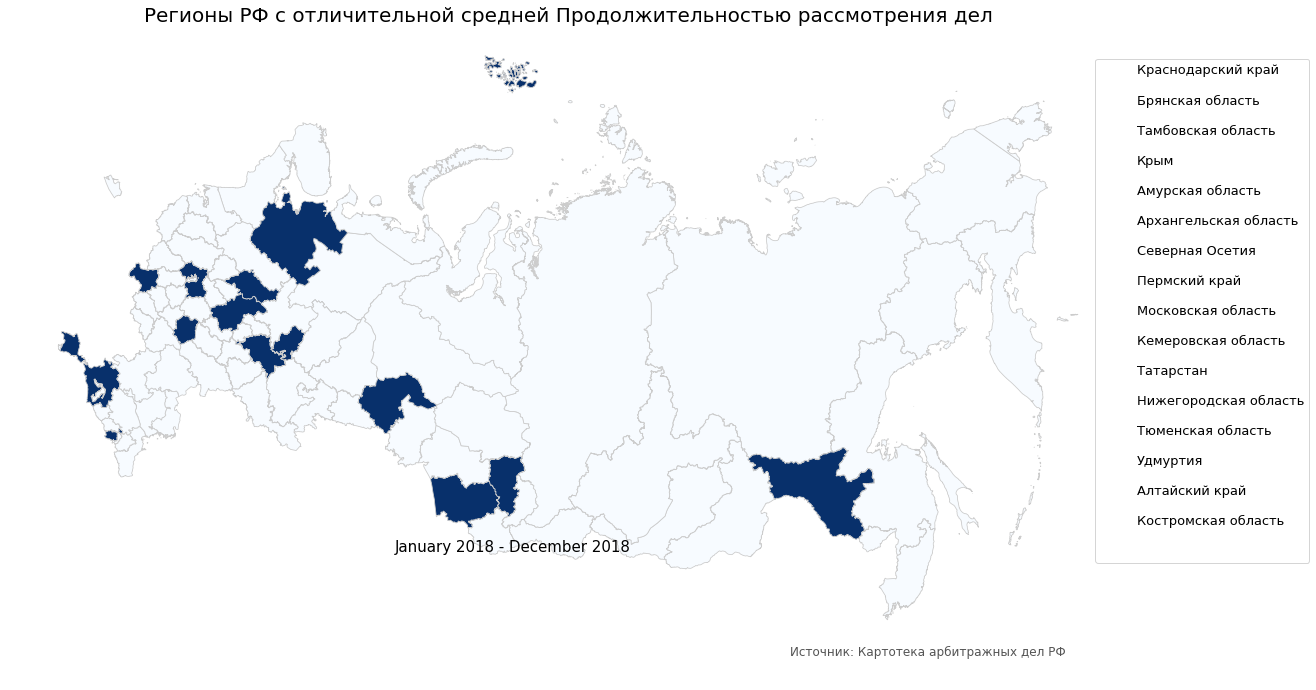

In [ ]:
from datetime import timedelta

create_regions_map_from_hypo_matrix('2018-01-01', timedelta(days=364), q_of_shown=15)